In [30]:
import os
import torch
import librosa
import torchaudio
import pandas as pd

import matplotlib.pyplot as plt

In [31]:
# data_dir = '/Users/rudyhendrawan/miniforge3/datasets/Bio-Akustik-Gajah'
data_dir = '/Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/'

# List of the text files (metadata) in the dataset
label_files = [f for f in os.listdir(data_dir) if f.endswith('.txt')]

# Initialize a list to store the metadata
metadata = pd.DataFrame()

# Iterate through the list of text files
for f in label_files:
	file_path = os.path.join(data_dir, f)
	# Read the text file
	try:
		df = pd.read_csv(
			file_path,
			sep='\t',
			encoding='ISO-8859-1',
			header=None,
			skiprows=1,
			names=['selection', 'view', 'channel', 'start_time', 'end_time', 'LowFreq', 'HighFreq', 'sound_category', 'sound_type', 'confidence', 'notes', 'name',])
	except pd.errors.ParserError:
		print(f'Error parsing file {f}')
	
	# Add the filename to the dataframe
	df['filename'] = f.replace('.txt', '.wav')

	# Concatenate the dataframes
	metadata = pd.concat([metadata, df], ignore_index=True)

metadata.head(10)

Error parsing file ELOC2_1654520897346_2022-06-06_23-08-17.txt


,selection,view,channel,start_time,end_time,LowFreq,HighFreq,sound_category,sound_type,confidence,notes,name,filename
0,1.0,Spectrogram 1,1.0,87.283492,87.757001,0.0,8000.0,elephant_vocalization,trumpet,3.0,"Boni, play/afraid",giot,0mCage_Eloc_20211011_075014.wav
1,2.0,Spectrogram 1,1.0,343.451859,344.209474,0.0,8000.0,elephant_vocalization,trumpet,3.0,"Boni, play/afraid",giot,0mCage_Eloc_20211011_075014.wav
2,3.0,Spectrogram 1,1.0,346.482317,347.050528,0.0,7582.6,elephant_vocalization,trumpet,3.0,"Boni, play/afraid",giot,0mCage_Eloc_20211011_075014.wav
3,4.0,Spectrogram 1,1.0,2537.533797,2538.627547,0.0,8000.0,elephant_sound,unidentified,2.0,"Chris, mungkin ada yang mengganggu di belalai ...",giot,0mCage_Eloc_20211011_075014.wav
4,5.0,Spectrogram 1,1.0,2734.408793,2735.457900,0.0,8000.0,elephant_sound,unidentified,2.0,"Chris, mungkin ada yang mengganggu di belalai ...",giot,0mCage_Eloc_20211011_075014.wav
5,6.0,Spectrogram 1,1.0,3559.977970,3560.692256,0.0,8000.0,elephant_sound,unidentified,3.0,"not sure from which elephant, maybe Eropa (?)",giot,0mCage_Eloc_20211011_075014.wav
6,1.0,Spectrogram 1,1.0,1850.412914,1850.915146,0.0,8000.0,elephant_vocalization,trumpet,3.0,"Boni, play/afraid",Giot,0mCage_Eloc_20211011_085014.wav
7,2.0,Spectrogram 1,1.0,2132.734338,2133.415141,0.0,8000.0,elephant_vocalization,trumpet,3.0,"Boni, afraid",Giot,0mCage_Eloc_20211011_085014.wav
8,3.0,Spectrogram 1,1.0,3049.477440,3049.901547,260.9,4643.5,elephant_vocalization,trumpet,2.0,"yuni, habis dimarahin mahout karna ambil pisan...",Giot,0mCage_Eloc_20211011_085014.wav
9,1.0,Spectrogram 1,1.0,699.814732,700.667048,393.5,2367.3,elephant_vocalization,trumpet,3.0,maybe Olive from far away,Giot,0mCage_Eloc_20211011_155016.wav


In [32]:
# metadata.to_csv('metadata.csv', index=False)

In [33]:
len(label_files)

207

In [34]:
metadata.shape

(2062, 13)

In [35]:
metadata.iloc[0]['start_time']

87.283491787

In [36]:
import librosa
from IPython.display import Audio

audio_file = os.path.join(data_dir, metadata.iloc[0]['filename'])
start_time = metadata.iloc[0]['start_time']
end_time = metadata.iloc[0]['end_time']
print("Start time: ", start_time)
print("End time: ", end_time)

# Load audio
audio_data, sample_rate = librosa.load(audio_file, sr=None, mono=False)

# Convert start and end times to sample indices
start_idx= librosa.time_to_samples(start_time, sr=sample_rate)
end_idx = librosa.time_to_samples(end_time, sr=sample_rate)

audio_segment = audio_data[start_idx:end_idx]

print("Audio data shape: {}".format(audio_data.shape))
print("Sample rate: {}".format(sample_rate))

print("Audio segment: {}".format(audio_segment))
print("Audio segment shape: {}".format(audio_segment.shape))
print(start_idx)
print(end_idx)

# Reshape to (1, xx) if mono
if audio_segment.ndim == 1:
	audio_segment = audio_segment.reshape(1, -1)
print("Audio segment: {}".format(audio_segment))
print("Audio segment shape: {}".format(audio_segment.shape))
print(audio_segment[0])

Start time:  87.283491787
End time:  87.757000784
Audio data shape: (57600000,)
Sample rate: 16000
Audio segment: [ 0.03518677  0.03198242  0.03201294 ... -0.02407837 -0.01452637
 -0.01940918]
Audio segment shape: (7577,)
1396535
1404112
Audio segment: [[ 0.03518677  0.03198242  0.03201294 ... -0.02407837 -0.01452637
  -0.01940918]]
Audio segment shape: (1, 7577)
[ 0.03518677  0.03198242  0.03201294 ... -0.02407837 -0.01452637
 -0.01940918]


In [37]:
Audio(audio_segment[0], rate=sample_rate)

In [38]:
def plot_waveform(waveform, sample_rate):
	num_channels, num_frames = waveform.shape
	time_axis = torch.arange(0, num_frames) / sample_rate
	figure, axes = plt.subplots(num_channels, 1)

	if num_channels == 1:
		axes = [axes]
	
	for c in range(num_channels):
		axes[c].plot(time_axis, waveform[c], linewidth=1)
		axes[c].grid(True)
		if num_channels > 1:
			axes[c].set_ylabel(f'Channel {c+1}')
	
	figure.suptitle('Waveform')
	plt.show(block=False)

def plot_spectogram(waveform, sample_rate, title='Spectrogram'):
	num_channels, num_frames = waveform.shape
	figure, axes = plt.subplots(num_channels, 1)

	if num_channels == 1:
		axes = [axes]

	for c in range(num_channels):
		axes[c].specgram(waveform[c], Fs=sample_rate)
		axes[c].grid(True)
		if num_channels > 1:
			axes[c].set_ylabel(f'Channel {c+1}')
	
	figure.suptitle(title)
	plt.show(block=False)

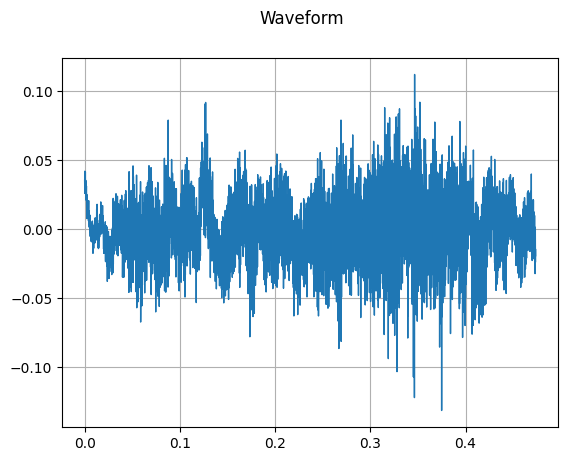

In [39]:
plot_waveform(audio_segment, sample_rate)

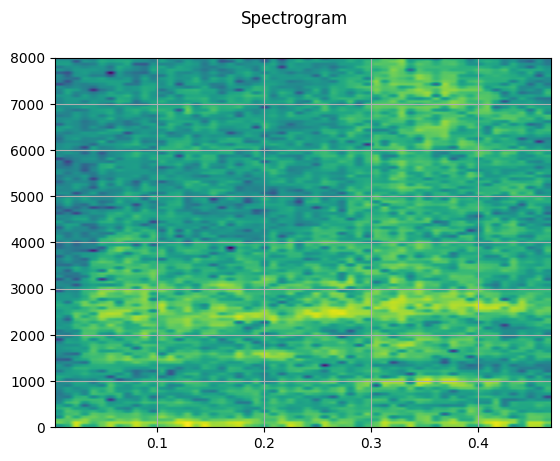

In [40]:
plot_spectogram(audio_segment, sample_rate)

In [41]:
metadata.isna().sum()

selection          16
view               16
channel            16
start_time         16
end_time           16
LowFreq            16
HighFreq           16
sound_category     40
sound_type         42
confidence         43
notes             975
name               17
filename            0
dtype: int64

In [42]:
# Get the unique sound types as class name
class_name = metadata['sound_type'].unique()
print("Class names: {}".format(class_name))

Class names: ['trumpet' 'unidentified' 'rumble' 'long_roar' 'roar' 'snort' 'breathing'
 'roar_rumble' 'splatter_sand_and_water' 'growl' 'long_roar_rumble'
 'bark_rumble' 'groan' nan 'bark' 'fart' 'motorcycle_sound'
 'breaking_grass' 'firecracker' 'drink' 'water_splash' 1 'breaking_branch'
 'talking' 'suara Tongat' 'vehicle_sound' 'scream']


In [43]:
# Count values of each class
metadata['sound_type'].value_counts()

rumble                     753
trumpet                    406
growl                      210
unidentified               140
roar                       106
motorcycle_sound            94
snort                       77
firecracker                 73
roar_rumble                 53
breathing                   43
fart                        12
long_roar                    8
vehicle_sound                8
talking                      8
bark_rumble                  8
bark                         6
water_splash                 3
breaking_grass               2
drink                        2
breaking_branch              2
groan                        1
1                            1
long_roar_rumble             1
suara Tongat                 1
splatter_sand_and_water      1
scream                       1
Name: sound_type, dtype: int64

In [44]:
original_class = ['trumpet', 'growl', 'roar', 'roar_rumble', 'rumble', 'bark', 'bark_rumble']

In [45]:
import soundfile as sf

def process_and_save_audio_segments(metadata_df, input_audio_dir, output_audio_dir):
	output_metadata = []

	for index, row in metadata_df.iterrows():
		# Extract metadata
		start_time = row['start_time']
		end_time = row['end_time']
		class_name = row['sound_type']
		filename = row['filename']

		# Load the audio file
		audio_file_path = os.path.join(input_audio_dir, filename)
		audio_data, sample_rate = librosa.load(audio_file_path)

		# Convert start and end times to sample indices
		start_sample = librosa.time_to_samples(start_time, sr=sample_rate)
		end_sample = librosa.time_to_samples(end_time, sr=sample_rate)

		# Extract the audio segment
		audio_segment = audio_data[start_sample:end_sample]

		# Create output filename and path
		output_filename = f'{class_name}_{index}.wav'
		output_file_path = os.path.join(output_audio_dir, output_filename)

		# Save the audio segment as WAV File
		sf.write(output_file_path, audio_segment, sample_rate)

		# Add the metadata to the list
		output_metadata.append({
			'filename': output_filename,
			'sound_type': class_name,
			'sample_rate': sample_rate,
		})

	# Convert the list to Pandas DataFrame
	output_metadata = pd.DataFrame(output_metadata)
	return output_metadata

In [46]:
sample_data = metadata.sample(10)

output_sample_data = process_and_save_audio_segments(
	sample_data,
	data_dir,
	os.path.join(data_dir, 'sample_data'),
)

In [47]:
output_sample_data

,filename,sound_type,sample_rate
0,firecracker_1533.wav,firecracker,22050
1,rumble_575.wav,rumble,22050
2,unidentified_1890.wav,unidentified,22050
3,rumble_549.wav,rumble,22050
4,firecracker_1316.wav,firecracker,22050
5,nan_836.wav,NaN,22050
6,roar_rumble_175.wav,roar_rumble,22050
7,nan_654.wav,NaN,22050
8,rumble_414.wav,rumble,22050
9,rumble_132.wav,rumble,22050


In [23]:
sample_dir = os.path.join(data_dir, 'sample_data')
print(os.path.join(sample_dir, 'rumble_247.wav'))

/Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data\rumble_247.wav


In [26]:
sample = torchaudio.info(os.path.join(sample_dir, 'rumble_247.wav'))
print(sample)

AudioMetaData(sample_rate=22050, num_frames=108270, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [27]:
sample = torchaudio.info(os.path.join(sample_dir, 'roar_669.wav'))
print(sample)

AudioMetaData(sample_rate=22050, num_frames=23625, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [50]:
# Store torchaudio.info() return values to dataframe
output_sample_data['num_frames'] = output_sample_data['filename'].apply(
	lambda x: torchaudio.info(os.path.join(sample_dir, x)).num_frames
)
output_sample_data['num_channels'] = output_sample_data['filename'].apply(
	lambda x: torchaudio.info(os.path.join(sample_dir, x)).num_channels
)
output_sample_data['bits_per_sample'] = output_sample_data['filename'].apply(
	lambda x: torchaudio.info(os.path.join(sample_dir, x)).bits_per_sample
)
output_sample_data['encoding'] = output_sample_data['filename'].apply(
	lambda x: torchaudio.info(os.path.join(sample_dir, x)).encoding
)
output_sample_data


,filename,sound_type,sample_rate,num_frames,num_channels,bits_per_sample,encoding
0,firecracker_1533.wav,firecracker,22050,16948,1,16,PCM_S
1,rumble_575.wav,rumble,22050,103017,1,16,PCM_S
2,unidentified_1890.wav,unidentified,22050,15056,1,16,PCM_S
3,rumble_549.wav,rumble,22050,66125,1,16,PCM_S
4,firecracker_1316.wav,firecracker,22050,27195,1,16,PCM_S
5,nan_836.wav,NaN,22050,13461,1,16,PCM_S
6,roar_rumble_175.wav,roar_rumble,22050,229390,1,16,PCM_S
7,nan_654.wav,NaN,22050,12529,1,16,PCM_S
8,rumble_414.wav,rumble,22050,83875,1,16,PCM_S
9,rumble_132.wav,rumble,22050,106857,1,16,PCM_S


In [29]:
sample.sample_rate

22050